In [46]:
import pandas as pd
import os

os.chdir('/home/brian/Documents/CPS/')

In [47]:
df = (pd.read_feather('data/clean/cps2017.ft')
        .append(pd.read_feather('data/clean/cps2018.ft'))
        .query('PWLGWGT > 0'))

# Generate unique ID
df['UID'] = (df['STATE'].astype(str) + 
             df['HRHHID'].astype(str) + 
             df['HRHHID2'].astype(str) + 
             df['PULINENO'].astype(str))

# Filter column-wise
df = df[['UID', 'HRMONTH', 'HRYEAR4', 'HRMIS', 'LMSTAT', 
         'PWLGWGT', 'AGE', 'FEMALE', 'PRDTRACE']]

df1 = df.query('HRMONTH == 5 and HRYEAR4 == 2017 and HRMIS == 4')
df2 = df.query('HRMONTH == 5 and HRYEAR4 == 2018 and HRMIS == 8')

In [54]:
naive = pd.merge(df1, df2, on='UID', how='inner')

# Filter by SRA
mdata = naive[(naive['FEMALE_x'] == naive['FEMALE_y']) &
              (naive['PRDTRACE_x'] == naive['PRDTRACE_y']) &
              (naive['AGE_x'] <= naive['AGE_y'] + 2) &
              (naive['AGE_y'] >= naive['AGE_x'])]  

In [55]:
mdata[mdata['LMSTAT_x'] != mdata['LMSTAT_y']]['PWLGWGT_x'].sum() / mdata['PWLGWGT_x'].sum()

0.28329378

In [53]:
mdata

,UID,HRMONTH_x,HRYEAR4_x,HRMIS_x,LMSTAT_x,PWLGWGT_x,AGE_x,FEMALE_x,PRDTRACE_x,HRMONTH_y,HRYEAR4_y,HRMIS_y,LMSTAT_y,PWLGWGT_y,AGE_y,FEMALE_y,PRDTRACE_y
0,AL11094717093561111,5,2017,4,NILF - Family,3219.648682,31,1,2,5,2018,8,NILF - Family,2608.304688,32,1,2
1,AL11094717093561112,5,2017,4,Employed - FT - private goods producing,2853.406738,41,0,2,5,2018,8,Employed - FT - private goods producing,2959.614014,42,0,2
2,AL11094717093560111,5,2017,4,Employed - FT - private goods producing,2744.364502,36,0,1,5,2018,8,Employed - FT - private goods producing,3468.216797,37,0,1
3,AL11094717093560112,5,2017,4,Employed - FT - private goods producing,2538.573486,34,1,1,5,2018,8,Employed - FT - private goods producing,2180.755127,35,1,1
4,AL797041009511360111,5,2017,4,NILF - Retired,2056.204346,70,0,2,5,2018,8,NILF - Retired,1975.165649,71,0,2
5,AL797041009511360112,5,2017,4,NILF - Retired,2359.381104,68,1,2,5,2018,8,NILF - Retired,2098.369141,68,1,2
6,AL1071914090350760111,5,2017,4,Employed - FT - private services producing,2520.657715,50,1,1,5,2018,8,Employed - FT - self-employed,2710.054688,52,1,1
7,AL1203091202511960111,5,2017,4,Employed - FT - private services producing,2764.519287,59,1,2,5,2018,8,Employed - FT - private services producing,2627.828857,60,1,2
8,AL1203091202511960112,5,2017,4,Employed - FT - private goods producing,2032.440430,59,0,2,5,2018,8,Employed - FT - private goods producing,2150.576904,60,0,2
9,AL4508152100517161111,5,2017,4,NILF - Retired,2242.286377,69,0,1,5,2018,8,NILF - Retired,2236.635498,71,0,1


In [50]:
result = mdata[mdata['LMSTAT_x'] != mdata['LMSTAT_y']]#[['LMSTAT_x', 'LMSTAT_y']]

In [51]:
result['flow'] = result['LMSTAT_x'].astype(str) + result['LMSTAT_y'].astype(str)

/home/brian/miniconda3/envs/bdcps/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
result.groupby('flow')['PWLGWGT_x'].sum().sort_values()

flow
Employed - FT - government or nonprofitNILF - Other                                     483.423187
NILF - Disabled/illEmployed - FT - self-employed                                        829.315491
NILF - Disabled/illEmployed - FT - government or nonprofit                             1849.637817
Employed - FT - self-employedNILF - Discouraged                                        2490.447754
NILF - DiscouragedNILF - Other                                                         2653.727295
NILF - SchoolNILF - Retired                                                            3503.138428
NILF - Disabled/illNILF - Other                                                        3843.354492
NILF - RetiredUnemployed                                                               4386.602051
NILF - OtherEmployed - FT - government or nonprofit                                    5262.286621
Employed - FT - self-employedEmployed - FT - government or nonprofit                   5268.004883
Emplo

In [24]:
df

,HRHHID,HRMONTH,HRYEAR4,HRMIS,HRHHID2,GESTFIPS,GTCBSA,GTMETSTA,GTCSA,AGE,...,LMSTAT,EMP,UNEMPTYPE,UNEMPDUR,WKWAGE,HRWAGE,RHRWAGE,RWKWAGE,CERT,UID
741061,110470885925,4,2018,1,8011,1,-31676,1,0,65,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,0,AL11047088592580111
741062,110470885925,4,2018,1,8011,1,-31676,1,0,65,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,1,AL11047088592580112
741066,110609947190,4,2018,1,8011,1,26620,1,0,65,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,0,AL11060994719080111
741067,110609947190,4,2018,1,8011,1,26620,1,0,68,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,0,AL11060994719080112
741068,110609947190,4,2018,1,8011,1,26620,1,0,2,...,Under 16,0,nan,NaN,NaN,NaN,NaN,NaN,0,AL11060994719080114
741069,110609947190,4,2018,1,8011,1,26620,1,0,8,...,Under 16,0,nan,NaN,NaN,NaN,NaN,NaN,0,AL11060994719080113
741115,8850215078108,4,2018,1,8011,1,-31876,1,380,80,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,1,AL885021507810880111
741116,8850215078108,4,2018,1,8011,1,-31876,1,380,75,...,Employed - FT - self-employed,1,nan,NaN,NaN,NaN,NaN,NaN,0,AL885021507810880112
741120,9018752110018,4,2018,1,8011,1,13820,1,0,36,...,Employed - FT - private services producing,1,nan,NaN,NaN,NaN,NaN,NaN,0,AL901875211001880111
741121,9018752110018,4,2018,1,8011,1,13820,1,0,35,...,NILF - Family,0,nan,NaN,NaN,NaN,NaN,NaN,0,AL901875211001880112


In [11]:
df.query('HRMONTH == 4 and HRMIS == 1')

,HRHHID,HRMONTH,HRYEAR4,HRMIS,HRHHID2,GESTFIPS,GTCBSA,GTMETSTA,GTCSA,AGE,...,LMSTAT,EMP,UNEMPTYPE,UNEMPDUR,WKWAGE,HRWAGE,RHRWAGE,RWKWAGE,CERT,UID
741061,110470885925,4,2018,1,8011,1,-31676,1,0,65,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,0,0 AL\n1 AL\n2 AL\n3...
741062,110470885925,4,2018,1,8011,1,-31676,1,0,65,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,1,0 AL\n1 AL\n2 AL\n3...
741066,110609947190,4,2018,1,8011,1,26620,1,0,65,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,0,0 AL\n1 AL\n2 AL\n3...
741067,110609947190,4,2018,1,8011,1,26620,1,0,68,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,0,0 AL\n1 AL\n2 AL\n3...
741068,110609947190,4,2018,1,8011,1,26620,1,0,2,...,Under 16,0,nan,NaN,NaN,NaN,NaN,NaN,0,0 AL\n1 AL\n2 AL\n3...
741069,110609947190,4,2018,1,8011,1,26620,1,0,8,...,Under 16,0,nan,NaN,NaN,NaN,NaN,NaN,0,0 AL\n1 AL\n2 AL\n3...
741115,8850215078108,4,2018,1,8011,1,-31876,1,380,80,...,NILF - Retired,0,nan,NaN,NaN,NaN,NaN,NaN,1,0 AL\n1 AL\n2 AL\n3...
741116,8850215078108,4,2018,1,8011,1,-31876,1,380,75,...,Employed - FT - self-employed,1,nan,NaN,NaN,NaN,NaN,NaN,0,0 AL\n1 AL\n2 AL\n3...
741120,9018752110018,4,2018,1,8011,1,13820,1,0,36,...,Employed - FT - private services producing,1,nan,NaN,NaN,NaN,NaN,NaN,0,0 AL\n1 AL\n2 AL\n3...
741121,9018752110018,4,2018,1,8011,1,13820,1,0,35,...,NILF - Family,0,nan,NaN,NaN,NaN,NaN,NaN,0,0 AL\n1 AL\n2 AL\n3...


In [15]:
df['UID'].head()

0    0          AL\n1          AL\n2          AL\n3...
1    0          AL\n1          AL\n2          AL\n3...
2    0          AL\n1          AL\n2          AL\n3...
3    0          AL\n1          AL\n2          AL\n3...
4    0          AL\n1          AL\n2          AL\n3...
Name: UID, dtype: object

In [1]:
import pandas as pd
import numpy as np
import os

cps_dir = '/home/brian/Documents/CPS/data/'

def binned_wage_calc(dfm):
    """Return BLS-styled binned median wage"""
    wage_var = 'RHRWAGE'
    wage_ranges = list(np.arange(0.25,300,0.5))
    if 'RWKWAGE' in dfm.keys():
        wage_var = 'RWKWAGE'
        wage_ranges = list(np.arange(1.25,3000,2.5))      
    dft = (dfm.sort_values(wage_var)
              .assign(WAGE_RANGE = (lambda x: pd.cut(x[wage_var], wage_ranges, 
                                           include_lowest=True)),
                      CS = lambda x: x['PWORWGT'].cumsum()))
    d = {}
    for pt in [('25th', 0.25), ('50th', 0.5), ('10th', 0.1)]:
        midpt = dft['PWORWGT'].sum() * pt[1]
        mid_interval = dft.iloc[(dft['CS']-midpt).abs().argsort()[:1]].WAGE_RANGE.values[0]

        wage_bins = list(dft['WAGE_RANGE'].unique())

        mi_loc = wage_bins.index(mid_interval)
        lowval = dft[dft['WAGE_RANGE'] == wage_bins[mi_loc-1]].iloc[-1].CS
        highval = dft[dft['WAGE_RANGE'] == wage_bins[mi_loc]].iloc[-1].CS

        d[pt[0]] = ((((midpt - lowval) / (highval - lowval)) * 0.5) + mid_interval.left)
    
    return(d)

In [7]:
pd.read_feather('/home/brian/Documents/CPS/data/clean/cps2018.ft')['LMSTAT'].unique()

[NILF - Disabled/ill, NILF - Retired, Employed - FT - private services producing, Employed - PT or unpaid, Employed - FT - government or nonprofit, ..., Unemployed, NILF - Other, NILF - School, NILF - Family, NILF - Discouraged]
Length: 12
Categories (12, object): [NILF - Disabled/ill, NILF - Retired, Employed - FT - private services producing, Employed - PT or unpaid, ..., NILF - Other, NILF - School, NILF - Family, NILF - Discouraged]

In [2]:
query_str = 'AGE >= 25 and AGE <= 54 and RHRWAGE > 0'
def wage_calc(query_str, cps_dir):
    cps_files = pd.Series([pd.to_datetime(file[:5], format='%b%y') 
                           for file in os.listdir(cps_dir) 
                           if file.endswith('.dat')])

    dt_windows = [pd.date_range(end=mo, periods=12, freq='MS') 
                      for mo in cps_files.sort_values()[11:]]

    years = list(set([file.year for file in cps_files]))

    filter_cols = ['HRYEAR4', 'HRMONTH', 'RHRWAGE', 'PWORWGT']

    cps_date = lambda x: pd.to_datetime(
        dict(year=x.HRYEAR4, month=x.HRMONTH, day=1))
    df = pd.concat([
         (pd.read_feather(f'{cps_dir}/clean/cps{year}.ft', nthreads=3)
            .query(query_str)
            .filter(filter_cols)
            .assign(DATE = cps_date)
            .drop(['HRYEAR4', 'HRMONTH'], axis=1)) 
         for year in years])

    data = pd.DataFrame()
    for dw in dt_windows:
        med_wage = binned_wage_calc(df[df['DATE'].isin(dw)])
        for key in med_wage.keys():
            data.at[dw[-1], key] = med_wage[key]
            
    return(data)

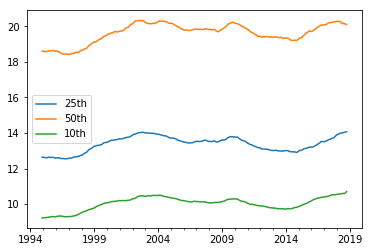

In [3]:
%matplotlib inline
wage_calc(query_str, cps_dir).plot()

In [5]:
df = wage_calc(query_str, cps_dir)

In [6]:
df

,25th,50th,10th
1994-12-01,12.638893,18.607526,9.230614
1995-01-01,12.623604,18.581254,9.224835
1995-02-01,12.633748,18.579247,9.244503
1995-03-01,12.616446,18.584371,9.234255
1995-04-01,12.599906,18.560374,9.241758
1995-05-01,12.615901,18.603636,9.257910
1995-06-01,12.641421,18.618548,9.268344
1995-07-01,12.631651,18.605761,9.262954
1995-08-01,12.622245,18.612375,9.279996
1995-09-01,12.630907,18.627975,9.299126


In [7]:
os.chdir('/home/brian/Documents/CPS/data/')

pd.read_feather('clean/cps2018.ft').groupby('LMSTAT')['PWSSWGT'].sum()

LMSTAT
Employed - FT - government or nonprofit       235143744.0
Employed - FT - private goods producing       390351456.0
Employed - FT - private services producing    428453504.0
Employed - FT - self-employed                 103714496.0
Employed - PT or unpaid                       246619408.0
NILF - Disabled/ill                           133604680.0
NILF - Discouraged                             42830320.0
NILF - Family                                 116307656.0
NILF - Other                                   20645254.0
NILF - Retired                                412595392.0
NILF - School                                 128066184.0
Unemployed                                     59044940.0
Name: PWSSWGT, dtype: float32

In [126]:
data.loc['2017-12-01']

18.55870836074247

In [27]:
dt_windows

[DatetimeIndex(['1994-01-01', '1994-02-01', '1994-03-01', '1994-04-01',
                '1994-05-01', '1994-06-01', '1994-07-01', '1994-08-01',
                '1994-09-01', '1994-10-01', '1994-11-01', '1994-12-01'],
               dtype='datetime64[ns]', freq='MS'),
 DatetimeIndex(['1994-02-01', '1994-03-01', '1994-04-01', '1994-05-01',
                '1994-06-01', '1994-07-01', '1994-08-01', '1994-09-01',
                '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01'],
               dtype='datetime64[ns]', freq='MS'),
 DatetimeIndex(['1994-03-01', '1994-04-01', '1994-05-01', '1994-06-01',
                '1994-07-01', '1994-08-01', '1994-09-01', '1994-10-01',
                '1994-11-01', '1994-12-01', '1995-01-01', '1995-02-01'],
               dtype='datetime64[ns]', freq='MS'),
 DatetimeIndex(['1994-04-01', '1994-05-01', '1994-06-01', '1994-07-01',
                '1994-08-01', '1994-09-01', '1994-10-01', '1994-11-01',
                '1994-12-01', '1995-01-01', '1995-02